# IMPORT AND CLEANING OF THE DATASET

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
wine = pd.read_csv("winequality-red.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine.shape              #no. of rows and columns in dataset

(1599, 12)

In [6]:
print("No.of rows = ", wine.shape[0])
print("No.of columns = ", wine.shape[1])

No.of rows =  1599
No.of columns =  12


# Getting Info of dataset

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
wine.isnull().sum()           #checking the null values in dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Bivariate Analysis of two variables


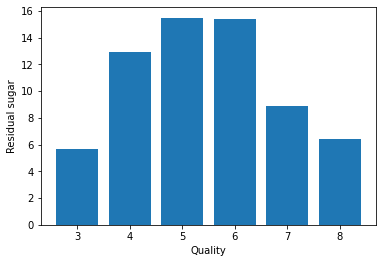

In [10]:
plt.bar(wine['quality'],wine['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('Residual sugar')
plt.show()

As the residual sugar increases the Quality of the Wine dectreases, we can check si,ilar for various variables

In [11]:
import seaborn as sns

<AxesSubplot:>

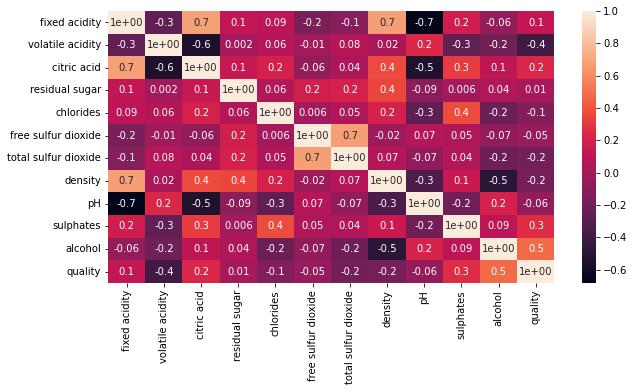

In [12]:
plt.figure(figsize=(10,5)) 
sns.heatmap(wine.corr(),annot=True,fmt='0.1')

# Target Value Information

In [13]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

6 unique values in quality but will be distinguished on 0 and 1.....proceed

<AxesSubplot:xlabel='quality', ylabel='count'>

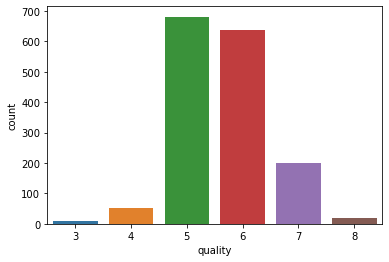

In [14]:
sns.countplot(x='quality', data=wine)

# Seperating features and the target

In [15]:
X = wine.drop('quality',axis=1)
Y = wine['quality']

In [16]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [17]:
print(Y)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


# Splitting the data into training data & test data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2) #80% as training data and 30% as test data

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1119, 11) (480, 11)


In [20]:
model= LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [21]:
model.intercept_

-0.5291005796560855

In [22]:
model.coef_

array([ 2.27881512e-03, -1.13491253e+00, -1.25447848e-01, -9.51555624e-03,
       -1.55064598e+00,  3.88759865e-03, -2.76001832e-03,  4.75749402e+00,
       -4.82285560e-01,  8.26131933e-01,  3.16832334e-01])

In [23]:
train_pred = model.predict(X_train)
train_pred

array([5.42449166, 5.9934626 , 6.05107539, ..., 5.73938217, 6.06608026,
       6.5880721 ])

In [24]:
test_pred = model.predict(X_test)
test_pred

array([5.92810289, 6.2328046 , 5.44339858, 5.32932285, 5.19847171,
       5.799938  , 5.09561833, 5.39601192, 5.54790919, 5.58881775,
       5.99586309, 6.19516468, 5.25858609, 5.85083249, 5.18644381,
       6.40745778, 5.85709434, 6.33248708, 5.65080799, 5.90047389,
       5.5029038 , 5.60532191, 5.63280989, 6.88030325, 5.20938455,
       6.37790176, 5.22481626, 6.36776516, 6.19908336, 5.48346924,
       5.29507505, 5.77090619, 5.37899848, 6.53853346, 6.19851534,
       5.3169022 , 5.81172572, 6.018211  , 5.83569283, 5.74940279,
       5.61480478, 5.84639022, 5.72921623, 5.26768107, 5.36576249,
       6.03144189, 5.67319418, 6.14689623, 5.78546594, 5.1983954 ,
       5.09127442, 4.75971259, 5.29228136, 5.81199393, 5.33167182,
       5.1157683 , 5.52017357, 5.29316054, 5.71996773, 5.77238242,
       4.80373417, 5.2201203 , 5.76872391, 5.08232802, 5.78372894,
       6.16096199, 6.2217833 , 6.41550491, 6.32516974, 5.96243679,
       5.45743761, 5.41300292, 5.69730157, 5.23292737, 5.01824

# Accuracy and Prediction

In [25]:
train_rmse = metrics.mean_squared_error(train_pred, Y_train) ** 0.5
train_rmse


0.647193352134527

In [26]:
test_rmse = metrics.mean_squared_error(test_pred, Y_test) ** 0.5
test_rmse

0.6461103803671769

In [27]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
predicted_data

array([6., 6., 5., 5., 5., 6., 5., 5., 6., 6., 6., 6., 5., 6., 5., 6., 6.,
       6., 6., 6., 6., 6., 6., 7., 5., 6., 5., 6., 6., 5., 5., 6., 5., 7.,
       6., 5., 6., 6., 6., 6., 6., 6., 6., 5., 5., 6., 6., 6., 6., 5., 5.,
       5., 5., 6., 5., 5., 6., 5., 6., 6., 5., 5., 6., 5., 6., 6., 6., 6.,
       6., 6., 5., 5., 6., 5., 5., 6., 6., 6., 6., 5., 5., 6., 6., 6., 7.,
       6., 5., 5., 5., 6., 6., 5., 5., 6., 5., 6., 5., 5., 5., 5., 6., 5.,
       5., 5., 6., 7., 6., 5., 6., 6., 6., 6., 6., 5., 6., 6., 5., 6., 6.,
       6., 5., 6., 6., 6., 6., 6., 7., 6., 6., 6., 6., 5., 6., 6., 6., 5.,
       6., 6., 5., 6., 6., 6., 6., 6., 5., 6., 6., 6., 6., 6., 5., 6., 6.,
       5., 6., 6., 6., 6., 5., 6., 5., 5., 5., 5., 6., 7., 6., 6., 5., 5.,
       7., 6., 7., 6., 6., 6., 5., 6., 5., 6., 5., 6., 5., 6., 6., 5., 5.,
       5., 6., 6., 5., 6., 5., 5., 5., 6., 6., 5., 6., 7., 5., 6., 5., 5.,
       5., 5., 6., 6., 6., 5., 7., 5., 6., 5., 6., 6., 6., 6., 6., 6., 5.,
       6., 5., 6., 5., 5.

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, test_pred))
rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_pred))
print('Root Mean Squared Error:',rmse)

Mean Absolute Error: 0.5129506522989471
Mean Squared Error: 0.41745862361821806
Root Mean Squared Error: 0.6461103803671769


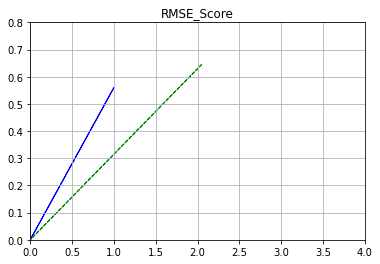

In [29]:
import matplotlib.pyplot as plt1
ax=plt1.axes()
color1= 'green'
color2= 'blue'
ax.arrow(0,0,1,0.56,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,2,0.63,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.8])
ax.set_xlim([0,4])
plt.grid()
plt.title('RMSE_Score')

plt1.show()

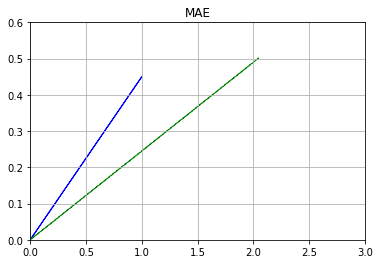

In [30]:
import matplotlib.pyplot as plt1
ax=plt1.axes()
color1= 'green'
color2= 'blue'
ax.arrow(0,0,1,0.45,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,2,0.49,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])
plt.grid()
plt.title('MAE')

plt1.show()